@misc{chollet2015keras,
  title={Keras},
  author={Chollet, Fran\c{c}ois and others},
  year={2015},
  howpublished={\url{https://keras.io}},
}

In [1]:
# Data augmentation on point cloud files for each class in the dataset. We aim to increase the number of files to a desired count (500)
# by copying existing files and applying Gaussian noise-based augmentation to generate additional files with variations.
# The augmented files are saved in an output directory. The code loops through each class, copies existing files, 
# and generates augmented versions until the desired count is reached, thus enhancing the dataset for our training machine learning models.

import os
import numpy as np
import shutil
import random

# Define the classes in your dataset
classes = ['2lanes', '3lanes', 'crossing', 'split4lanes', 'split6lanes', 'transition']

# Root directory for the dataset
root_dir = 'C:/Users/omar/Repo/Emad/Classification-of-number-of-lanes-transition-areas-and-crossing-from-point-clouds/dataset/'

# Output folder for augmented point clouds
output_folder = 'C:/Users/omar/Repo/Emad/Classification-of-number-of-lanes-transition-areas-and-crossing-from-point-clouds/augmented_pointclouds2'

# Number of desired augmented files per class
desired_augmented_files = 500

# Augmentation parameters
std_deviation = 0.01  # Standard deviation for Gaussian noise

# Load and augment the point cloud files for each class
for class_name in classes:
    folder_path = os.path.join(root_dir, class_name)
    output_class_folder = os.path.join(output_folder, class_name)
    os.makedirs(output_class_folder, exist_ok=True)

    file_list = os.listdir(folder_path)
    num_files_in_class = len(file_list)
    
    # Calculate how many files are needed to reach 500
    num_files_to_augment = max(0, desired_augmented_files - num_files_in_class)
    
    print(f'Class: {class_name}, Existing files: {num_files_in_class}, Files needed: {num_files_to_augment}')
    
    if num_files_to_augment > 0:
        # Copy the original files
        for file_name in file_list:
            if file_name.endswith('.npy'):
                file_path = os.path.join(folder_path, file_name)
                target_file_path = os.path.join(output_class_folder, file_name)
                shutil.copy(file_path, target_file_path)
                num_files_in_class += 1
                print(f'Copied {file_name}')
                if num_files_in_class >= desired_augmented_files:
                    break
        
        # Apply augmentation
        for file_name in os.listdir(output_class_folder):
            if file_name.endswith('.npy') and num_files_to_augment > 0:
                file_path = os.path.join(output_class_folder, file_name)
                pointcloud = np.load(file_path)  # Load all 22 features
                
                for i in range(num_files_to_augment):
                    noise = np.random.normal(scale=std_deviation, size=pointcloud.shape)
                    augmented_pointcloud = pointcloud + noise
    
                    variety_file_name = f'{os.path.splitext(file_name)[0]}_variety_{i}.npy'
                    variety_file_path = os.path.join(output_class_folder, variety_file_name)
                    np.save(variety_file_path, augmented_pointcloud)
                    
                    num_files_in_class += 1
                    num_files_to_augment -= 1
                    print(f'Augmented variety {num_files_in_class} for {file_name}')
                    
                    if num_files_to_augment <= 0:
                        break
    
    else:
        print(f'Class {class_name} already has {desired_augmented_files} files')

print('Data augmentation completed.')


Class: 2lanes, Existing files: 473, Files needed: 27
Copied Tile0.npy
Copied Tile1.npy
Copied Tile1000.npy
Copied Tile1001.npy
Copied Tile1002.npy
Copied Tile1003.npy
Copied Tile1004.npy
Copied Tile1005.npy
Copied Tile1006.npy
Copied Tile1008.npy
Copied Tile1009.npy
Copied Tile1010.npy
Copied Tile1011.npy
Copied Tile1016.npy
Copied Tile1017.npy
Copied Tile1018.npy
Copied Tile1019.npy
Copied Tile1020.npy
Copied Tile1021.npy
Copied Tile1025.npy
Copied Tile1026.npy
Copied Tile1028.npy
Copied Tile1030.npy
Copied Tile1031.npy
Copied Tile1032.npy
Copied Tile1033.npy
Copied Tile1034.npy
Augmented variety 501 for Tile0.npy
Augmented variety 502 for Tile0.npy
Augmented variety 503 for Tile0.npy
Augmented variety 504 for Tile0.npy
Augmented variety 505 for Tile0.npy
Augmented variety 506 for Tile0.npy
Augmented variety 507 for Tile0.npy
Augmented variety 508 for Tile0.npy
Augmented variety 509 for Tile0.npy
Augmented variety 510 for Tile0.npy
Augmented variety 511 for Tile0.npy
Augmented variety

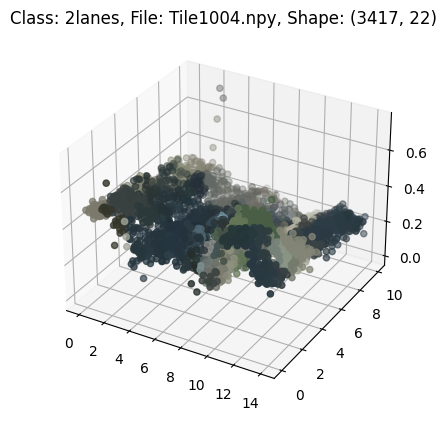

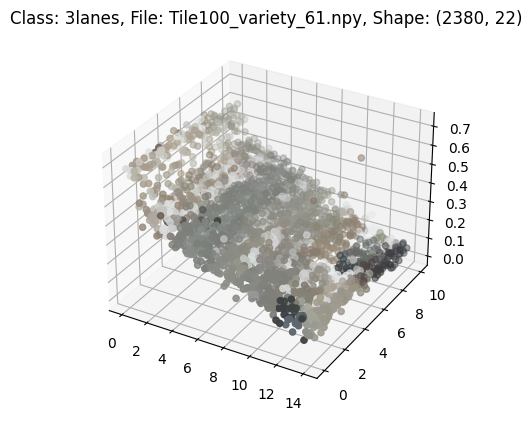

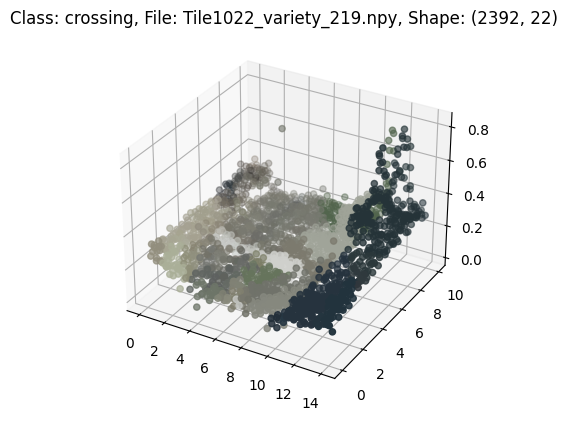

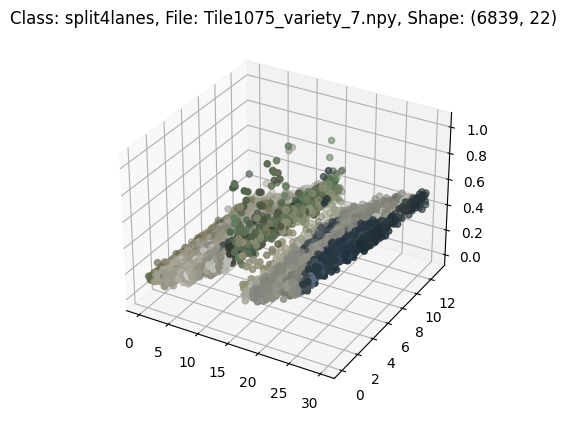

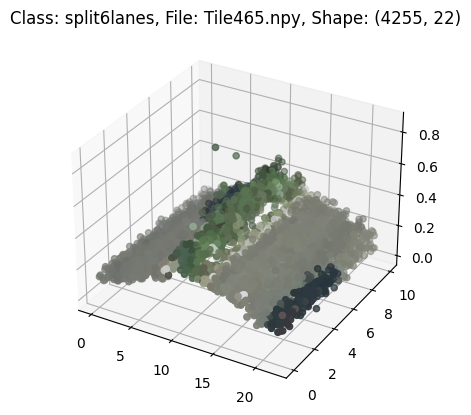

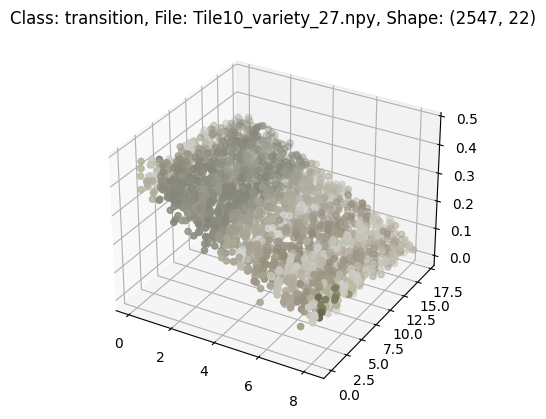

In [2]:
# Let us visualize some samples from each class

import os
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the classes in your dataset
classes = ['2lanes', '3lanes', 'crossing', 'split4lanes', 'split6lanes', 'transition']

# Output folder for augmented point clouds
output_folder = 'augmented_pointclouds'

# Number of samples to visualize per class
num_samples_to_visualize = 1

# Function to visualize point cloud
def visualize_pointcloud(pointcloud, class_name, file_name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pointcloud[:, 0], pointcloud[:, 1], pointcloud[:, 2], c=pointcloud[:, 3:6] / 255.0)
    plt.title(f'Class: {class_name}, File: {file_name}, Shape: {pointcloud.shape}')
    plt.show()

# Visualize samples from the folder
for class_name in classes:
    output_class_folder = os.path.join(output_folder, class_name)
    file_list = os.listdir(output_class_folder)
    
    for _ in range(num_samples_to_visualize):
        file_name = random.choice(file_list)
        file_path = os.path.join(output_class_folder, file_name)
        pointcloud = np.load(file_path)
        
        visualize_pointcloud(pointcloud, class_name, file_name)


In [1]:
# # Voxel downsampling and statistical outlier removal is applied. 
# The resulting inlier and outlier point clouds are visualized in a 3D viewer using different colors for clarity, 
# where inliers are displayed with their original colors and outliers are colored red. 
# This code showcases some common preprocessing and visualization steps when working with point cloud data.



import open3d as o3d
import numpy as np

# Load your numpy point cloud file (replace with your actual file path)
file_path = 'transition/Tile89.npy'
pointcloud = np.load(file_path)

# Extract point coordinates and colors
points = pointcloud[:, :3]
colors = pointcloud[:, 3:6] / 255.0  # Normalize color values to [0, 1]

# Create an Open3D point cloud object with colors
o3d_pointcloud = o3d.geometry.PointCloud()
o3d_pointcloud.points = o3d.utility.Vector3dVector(points)
o3d_pointcloud.colors = o3d.utility.Vector3dVector(colors)

# Downsample the point cloud using voxel downsampling
voxel_size = 0.02
downsampled_pcd = o3d_pointcloud.voxel_down_sample(voxel_size=voxel_size)

# Remove statistical outliers
cl, ind = downsampled_pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)

# Get inlier and outlier point clouds
inlier_cloud = downsampled_pcd.select_by_index(ind)
outlier_cloud = downsampled_pcd.select_by_index(ind, invert=True)

# Display the inlier and outlier point clouds resulting from statistical outlier removal
print("Showing outliers (red) and inliers (original colors): ")
outlier_cloud.paint_uniform_color([1, 0, 0])
inlier_cloud.colors = o3d.utility.Vector3dVector(colors[ind])  # Apply original colors to inlier cloud
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])


In [65]:
# Now let us apply this to all our dataset and export a processed dataset which we can work with for the Pointnet Model.

import os
import open3d as o3d
import numpy as np

def remove_outliers_and_export(file_path, output_path):
    # Load the point cloud from the provided file
    pointcloud = np.load(file_path)

    # Create an Open3D point cloud object
    o3d_pointcloud = o3d.geometry.PointCloud()
    o3d_pointcloud.points = o3d.utility.Vector3dVector(pointcloud[:, :3])

    # Downsample the point cloud using voxel downsampling
    voxel_size = 0.02
    downsampled_pcd = o3d_pointcloud.voxel_down_sample(voxel_size=voxel_size)

    # Remove statistical outliers
    nb_neighbors = 20
    std_ratio = 2.0
    cl, ind = downsampled_pcd.remove_statistical_outlier(nb_neighbors=nb_neighbors, std_ratio=std_ratio)

    # Create inlier point cloud
    inlier_cloud = downsampled_pcd.select_by_index(ind)

    # Convert the inlier point cloud to numpy array with original features
    inlier_pointcloud = np.hstack((np.asarray(inlier_cloud.points), pointcloud[ind, 3:]))

    # Save the inlier point cloud with outliers removed in numpy format
    np.save(output_path, inlier_pointcloud)

# Root directory for the dataset
root_dir = 'augmented_pointclouds'

# Output directory for the processed point clouds
output_dir = 'processed_pointclouds'

# Iterate through each class folder
for class_name in os.listdir(root_dir):
    class_folder = os.path.join(root_dir, class_name)
    
    # Create output directory for the class
    output_class_folder = os.path.join(output_dir, class_name)
    os.makedirs(output_class_folder, exist_ok=True)
    
    # Iterate through each model in the class folder
    for model_name in os.listdir(class_folder):
        model_path = os.path.join(class_folder, model_name)
        output_model_name = model_name.replace(".npy", "_processed.npy")
        output_model_path = os.path.join(output_class_folder, output_model_name)
        
        # Remove outliers and export the processed point cloud
        remove_outliers_and_export(model_path, output_model_path)
        print(f"Processed and exported: {output_model_path}")


Processed and exported: C:/Users/omar/Repo/Emad/Classification-of-number-of-lanes-transition-areas-and-crossing-from-point-clouds/processed_pointclouds\2lanes\Tile0_processed.npy
Processed and exported: C:/Users/omar/Repo/Emad/Classification-of-number-of-lanes-transition-areas-and-crossing-from-point-clouds/processed_pointclouds\2lanes\Tile0_variety_0_processed.npy
Processed and exported: C:/Users/omar/Repo/Emad/Classification-of-number-of-lanes-transition-areas-and-crossing-from-point-clouds/processed_pointclouds\2lanes\Tile0_variety_1_processed.npy
Processed and exported: C:/Users/omar/Repo/Emad/Classification-of-number-of-lanes-transition-areas-and-crossing-from-point-clouds/processed_pointclouds\2lanes\Tile0_variety_10_processed.npy
Processed and exported: C:/Users/omar/Repo/Emad/Classification-of-number-of-lanes-transition-areas-and-crossing-from-point-clouds/processed_pointclouds\2lanes\Tile0_variety_11_processed.npy
Processed and exported: C:/Users/omar/Repo/Emad/Classification-

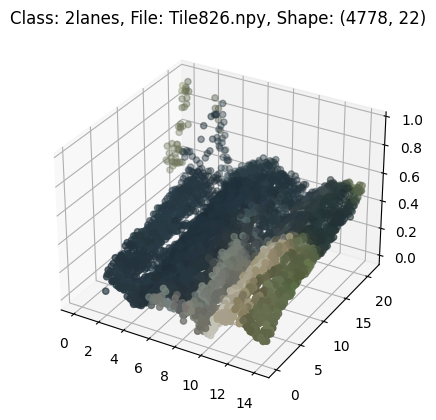

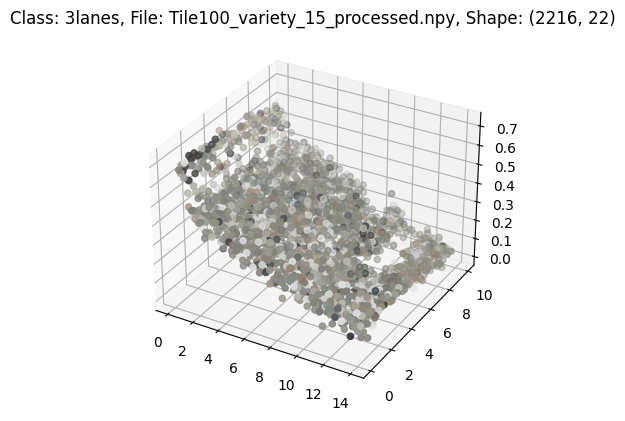

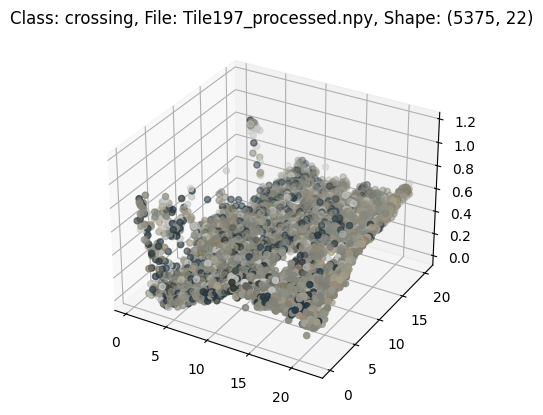

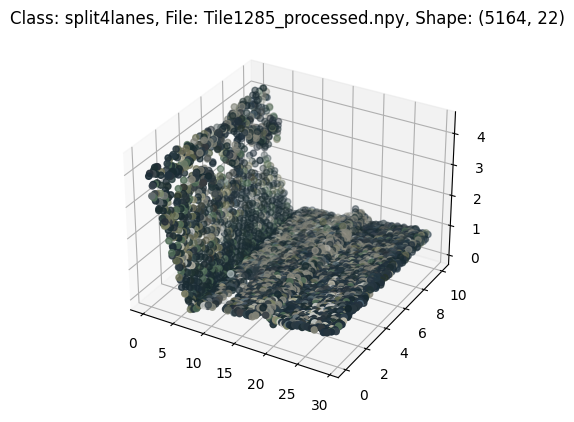

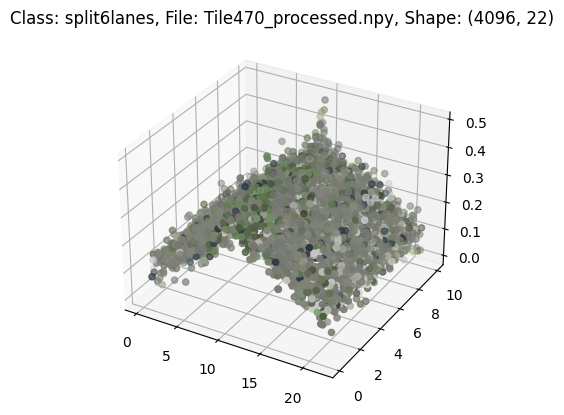

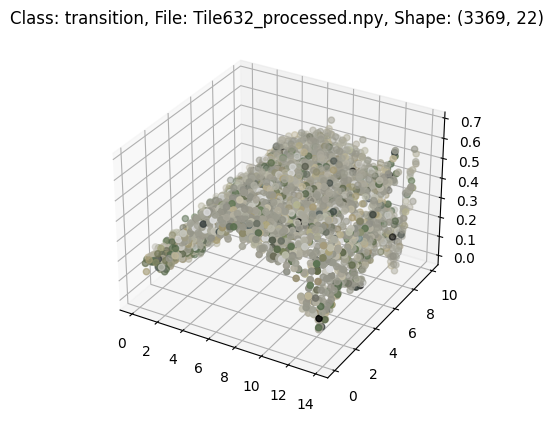

In [14]:
# Visualize Some Samples

import os
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the classes in your dataset
classes = ['2lanes', '3lanes', 'crossing', 'split4lanes', 'split6lanes', 'transition']

# Output folder for augmented point clouds
output_folder = 'processed_pointclouds'

# Number of samples to visualize per class
num_samples_to_visualize = 1

# Function to visualize point cloud
def visualize_pointcloud(pointcloud, class_name, file_name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pointcloud[:, 0], pointcloud[:, 1], pointcloud[:, 2], c=pointcloud[:, 3:6] / 255.0)
    plt.title(f'Class: {class_name}, File: {file_name}, Shape: {pointcloud.shape}')
    plt.show()

# Visualize samples from the folder
for class_name in classes:
    output_class_folder = os.path.join(output_folder, class_name)
    file_list = os.listdir(output_class_folder)
    
    for _ in range(num_samples_to_visualize):
        file_name = random.choice(file_list)
        file_path = os.path.join(output_class_folder, file_name)
        pointcloud = np.load(file_path)
        
        visualize_pointcloud(pointcloud, class_name, file_name)